In [1]:
import collections
user_dic = collections.defaultdict(int)
song_dic = collections.defaultdict(int)
edge_list = []
with open('data/train_triplets.txt', 'r') as f:
    for idx, line in enumerate(f.readlines()):
        if idx % 100000 == 0:
            print('idx:', idx)
        line = line.strip()
        fields = line.split('\t')
        user, song, weight = fields[0], fields[1], int(fields[2])
        user_dic[user] += 1
        song_dic[song] += 1
        edge_list.append((user, song, weight))
        line = f.readline()


idx: 0
idx: 100000
idx: 200000
idx: 300000
idx: 400000
idx: 500000
idx: 600000
idx: 700000
idx: 800000
idx: 900000
idx: 1000000
idx: 1100000
idx: 1200000
idx: 1300000
idx: 1400000
idx: 1500000
idx: 1600000
idx: 1700000
idx: 1800000
idx: 1900000
idx: 2000000
idx: 2100000
idx: 2200000
idx: 2300000
idx: 2400000
idx: 2500000
idx: 2600000
idx: 2700000
idx: 2800000
idx: 2900000
idx: 3000000
idx: 3100000
idx: 3200000
idx: 3300000
idx: 3400000
idx: 3500000
idx: 3600000
idx: 3700000
idx: 3800000
idx: 3900000
idx: 4000000
idx: 4100000
idx: 4200000
idx: 4300000
idx: 4400000
idx: 4500000
idx: 4600000
idx: 4700000
idx: 4800000
idx: 4900000
idx: 5000000
idx: 5100000
idx: 5200000
idx: 5300000
idx: 5400000
idx: 5500000
idx: 5600000
idx: 5700000
idx: 5800000
idx: 5900000
idx: 6000000
idx: 6100000
idx: 6200000
idx: 6300000
idx: 6400000
idx: 6500000
idx: 6600000
idx: 6700000
idx: 6800000
idx: 6900000
idx: 7000000
idx: 7100000
idx: 7200000
idx: 7300000
idx: 7400000
idx: 7500000
idx: 7600000
idx: 7700000
i

### Visualize User/Song Distribution

In [2]:
print('total number of users:', len(user_dic))
count = 0
for user in user_dic:
    if user_dic[user] > 1:
        count += 1
print('number of users with listen > 1:', count)

total number of users: 1019318
number of users with listen > 1: 1019318


In [34]:
import numpy as np
print('user 10 percentile:', np.percentile(list(user_dic.values()), 10))
print('user 90 percentile:', np.percentile(list(user_dic.values()), 90))
print('song 10 percentile:', np.percentile(list(song_dic.values()), 10))
print('song 90 percentile:', np.percentile(list(song_dic.values()), 90))

user 10 percentile: 12.0
user 90 percentile: 105.0
song 10 percentile: 2.0
song 90 percentile: 218.0


In [24]:
import pandas as pd

user_df = pd.DataFrame.from_dict(user_dic, orient='index')
user_df = user_df.reset_index()
user_df.columns = ['user_id', 'songs_listened']
user_df.head()

,user_id,songs_listened
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,104
1,85c1f87fea955d09b4bec2e36aee110927aedf9a,21
2,bd4c6e843f00bd476847fb75c47b4fb430a06856,11
3,8937134734f869debcab8f23d77465b4caaa85df,13
4,969cc6fb74e076a68e36a04409cb9d3765757508,33


In [28]:
selected_user_df = user_df.loc[((user_df.songs_listened > 12) & (user_df.songs_listened < 105)), :]

In [25]:
song_df = pd.DataFrame.from_dict(song_dic, orient='index')
song_df = song_df.reset_index()
song_df.columns = ['song_id', 'num_of_listened']
song_df.head()

,song_id,num_of_listened
0,SOAKIMP12A8C130995,2357
1,SOAPDEY12A81C210A9,723
2,SOBBMDR12A8C13253B,2097
3,SOBFNSP12AF72A0E22,277
4,SOBFOVM12A58A7D494,451


In [29]:
selected_song_df = song_df.loc[((song_df.num_of_listened > 2) & (song_df.num_of_listened < 218)), :]

In [27]:
triplet_df = pd.DataFrame(edge_list, columns=['user', 'song', 'weight'])
triplet_df.head()

,user,song,weight
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [32]:
selected_triplet_df = triplet_df.loc[((triplet_df.user.isin(selected_user_df['user_id'])) & (triplet_df.song.isin(selected_song_df['song_id']))), :]
selected_triplet_df.head()

,user,song,weight
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
16,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEGVZY12A58A7857E,1
17,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEKWEA12A6D4F5DC3,1
18,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEOBYG12A6D4F8AE2,1


In [33]:
selected_triplet_df.to_csv('selected_triplet.csv', index=False)

In [29]:
import numpy as np

print('User Distribution')
user_distribution = list(user_dic.values())
print('mean number of listen:', np.mean(user_distribution))
print('median numer of listen:', np.median(user_distribution))
print('max number of listen:', np.max(user_distribution))
print('min number of listen:', np.min(user_distribution))
print('------------------')
print('Song Distribution')
song_distribution = list(song_dic.values())
print('mean number of listened song:', np.mean(song_distribution))
print('median number of listened song:', np.median(song_distribution))
print('max number of listened song:', np.max(song_distribution))
print('min number of listened song:', np.min(song_distribution))

User Distribution
mean number of listen: 47.45681524313316
median numer of listen: 27.0
max number of listen: 4400
min number of listen: 10
------------------
Song Distribution
mean number of listened song: 125.79401684063805
median number of listened song: 13.0
max number of listened song: 110479
min number of listened song: 1


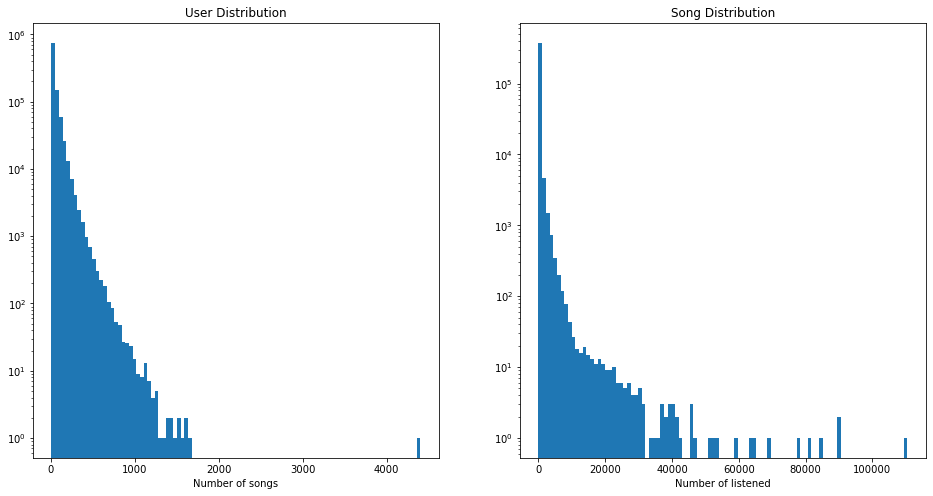

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('User Distribution')
plt.xlabel('Number of songs')
plt.hist(list(user_dic.values()), bins=100, log=True)
plt.subplot(122)
plt.title('Song Distribution')
plt.xlabel('Number of listened')
plt.hist(list(song_dic.values()), bins=100, log=True)
plt.show()


### Create Graph

In [19]:
import networkx as nx

def get_edgelist():
    edge_list = []
    with open('data/train_triplets.txt', 'r') as f:
        count = 0
        line = f.readline()
        while line:
            line = line.strip()
            fields = line.split('\t')
            user, song, weight = fields[0], fields[1], int(fields[2])
            edge_list.append((user, song, weight))
            line = f.readline()
            count += 1
            if count > 100:
                break
    return edge_list

G = nx.Graph()
edge_list = get_edgelist()
for user, song, weight in edge_list:
    G.add_edge(user, song, weight=weight)

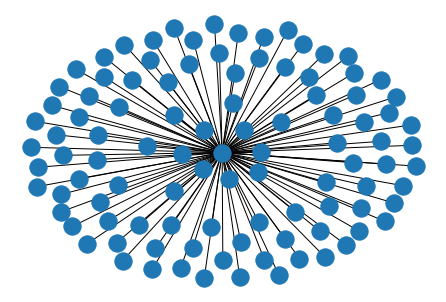

In [20]:
nx.draw(G)

In [5]:
edge_list

[('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOAKIMP12A8C130995', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOAPDEY12A81C210A9', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBBMDR12A8C13253B', 2),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBFNSP12AF72A0E22', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBFOVM12A58A7D494', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBNZDC12A6D4FC103', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBSUJE12A6D4F8CF5', 2),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBVFZR12A6D4F8AE3', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBXALG12A8C13C108', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBXHDL12A81C204C0', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOBYHAJ12A6701BF1D', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SOCNMUH12A6D4F6E6D', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SODACBL12A8C13C273', 1),
 ('b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'SODDNQT12A6D4F5F7

In [16]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3)], weight=2)